# Preprocess actigraph data

In [1]:
# Import packages
import os
import pickle
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

# Define all paths that are necessary
DPATH = "../data/"
IPATH = "../images/"
RPATH = "../results/"
CDPATH = "../data/condition/"
CNPATH = "../data/control/"

# Get all the files that are present in the directories
condn_files = os.listdir(CDPATH)
cntrl_files = os.listdir(CNPATH)

# Plotting settings
# In case the font Cambria is not locally installed in you system, 
# comment out the line below
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = 10,6

## 1. EDA

In [2]:
# Load a condition file
df_act_condn = pd.read_csv(CDPATH+"condition_1.csv")
display(df_act_condn.head(10))
print("Shape of the actigraph data:", df_act_condn.shape)

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166
5,2003-05-07 12:05:00,2003-05-07,160
6,2003-05-07 12:06:00,2003-05-07,17
7,2003-05-07 12:07:00,2003-05-07,646
8,2003-05-07 12:08:00,2003-05-07,978
9,2003-05-07 12:09:00,2003-05-07,306


Shape of the actigraph data: (23244, 3)


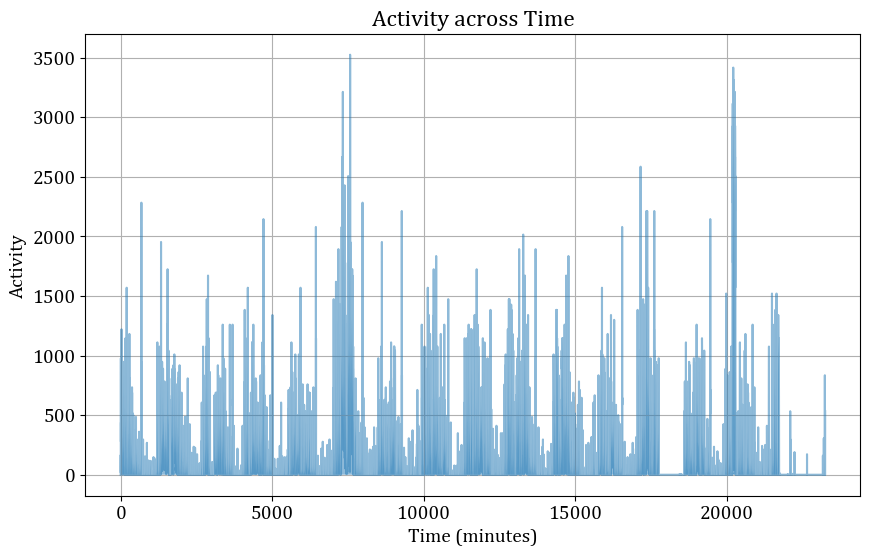

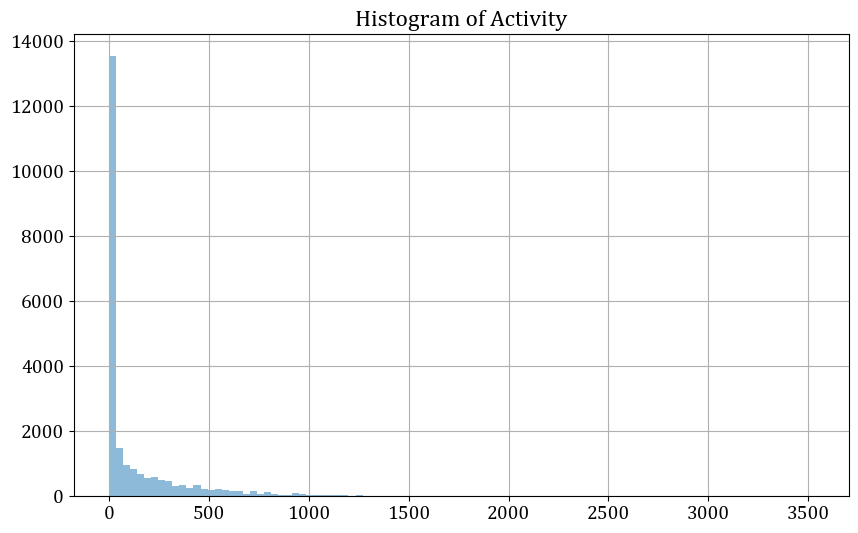

In [3]:
# Plot activity
plt.figure()
plt.plot(df_act_condn["activity"], alpha=0.5)
plt.fill_between(range(df_act_condn["activity"].shape[0]), df_act_condn["activity"], \
                 where=df_act_condn["activity"]>0, interpolate=True, alpha=0.5)
plt.xlabel("Time (minutes)")
plt.ylabel("Activity")
plt.title("Activity across Time")
plt.savefig(IPATH+"condn_0.png")
plt.show()

plt.figure()
plt.hist(df_act_condn["activity"], bins=100, alpha=0.5)
plt.title("Histogram of Activity")
plt.savefig(IPATH+"hist_condn_0.png")
plt.show()


2003-05-07 (720, 3) 174.14444444444445


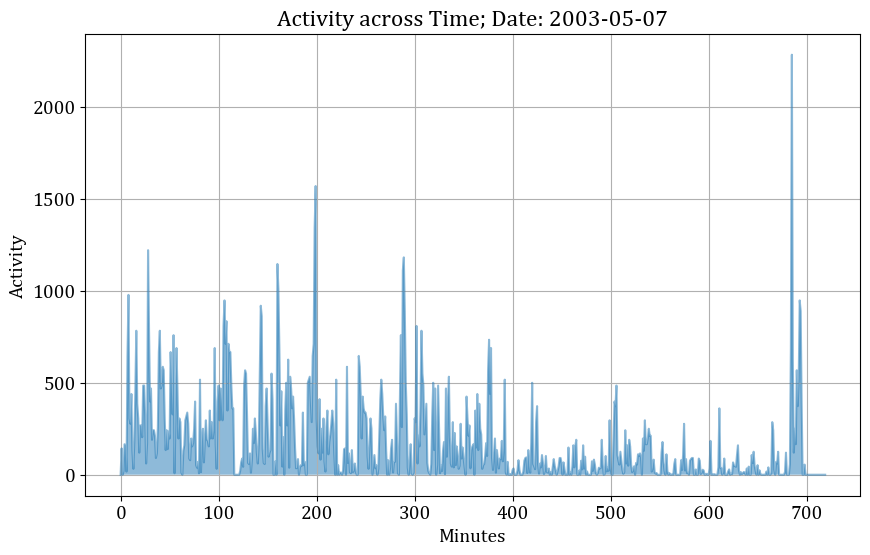

Max activity: 2284


0.25      11.00
0.50      76.00
0.75     259.00
0.99    1003.92
Name: activity, dtype: float64

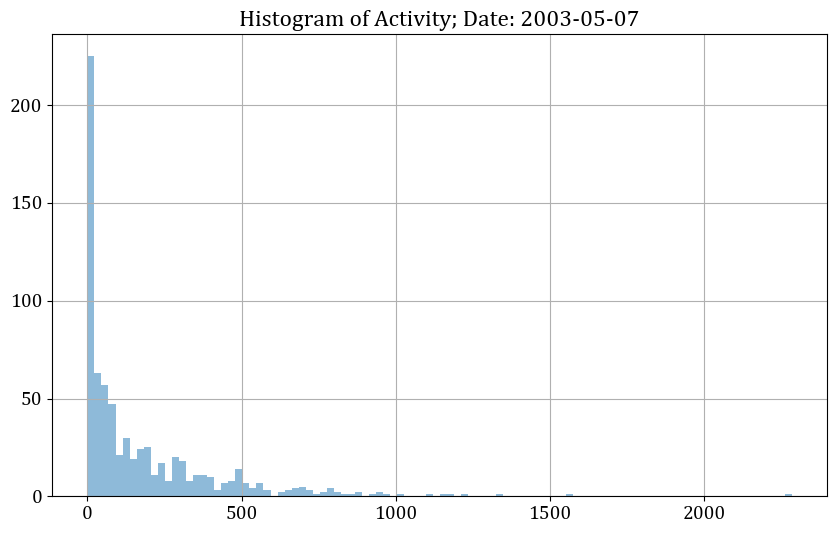

2003-05-08 (1440, 3) 156.24722222222223


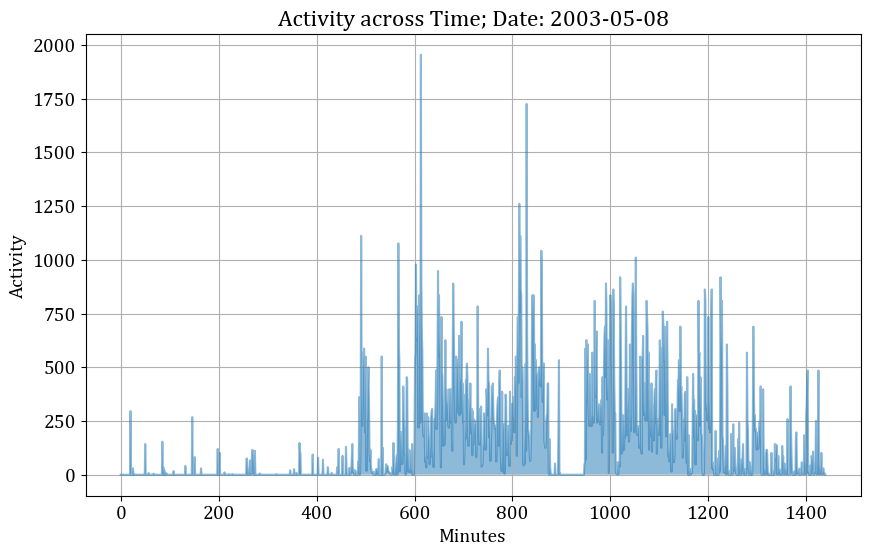

Max activity: 1954


0.25      0.00
0.50     27.00
0.75    252.25
0.99    890.00
Name: activity, dtype: float64

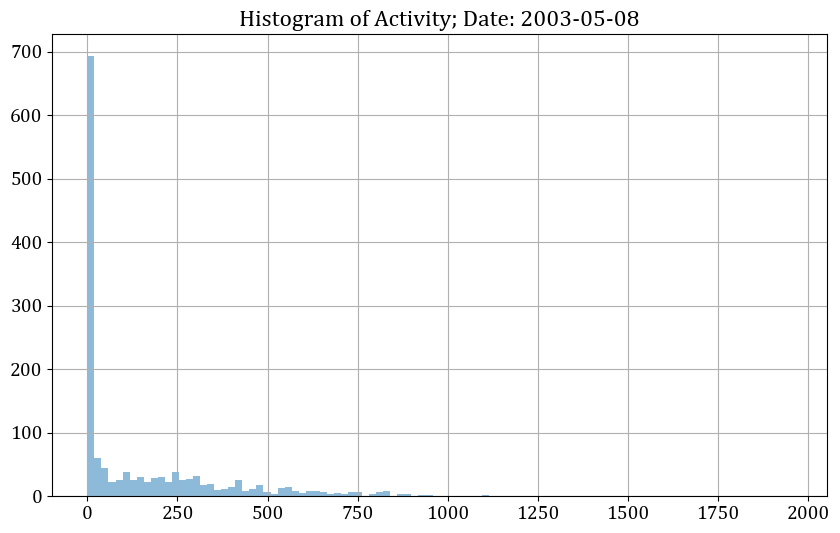

2003-05-09 (1440, 3) 124.13541666666667


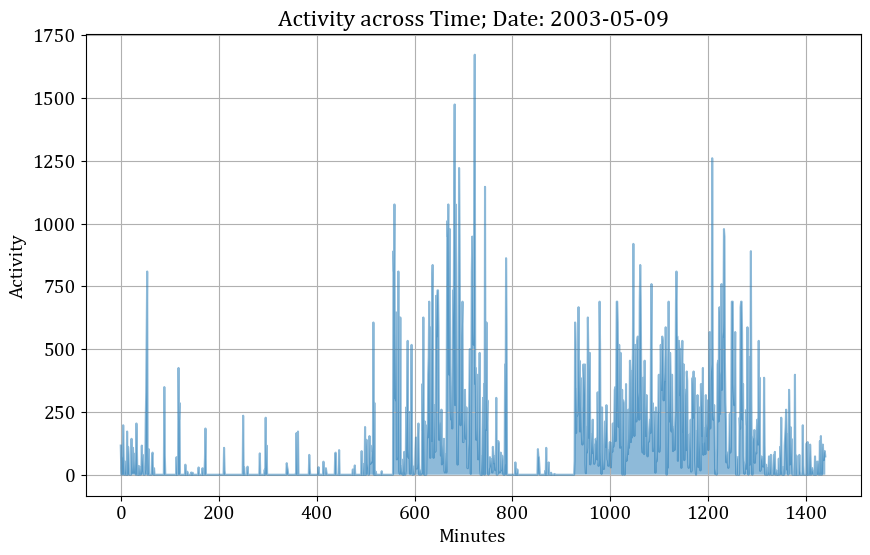

Max activity: 1672


0.25      0.0
0.50     14.0
0.75    172.0
0.99    948.0
Name: activity, dtype: float64

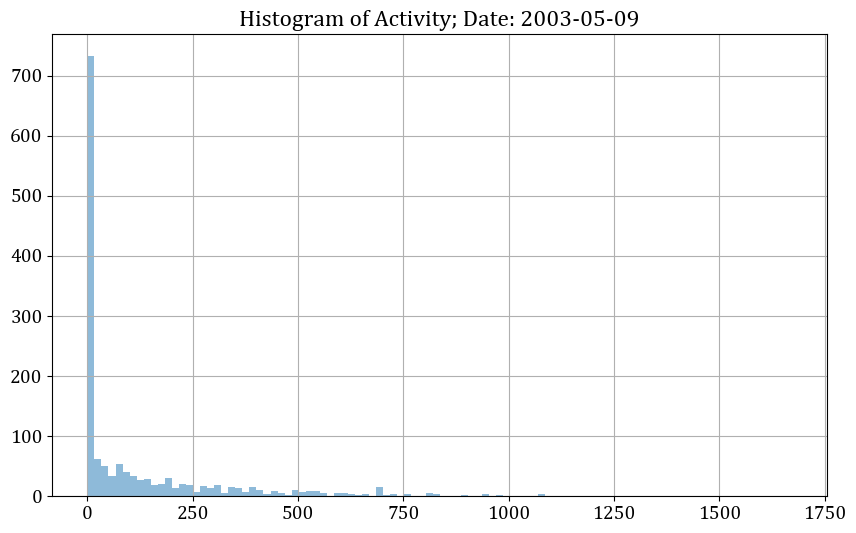

2003-05-10 (1440, 3) 134.96180555555554


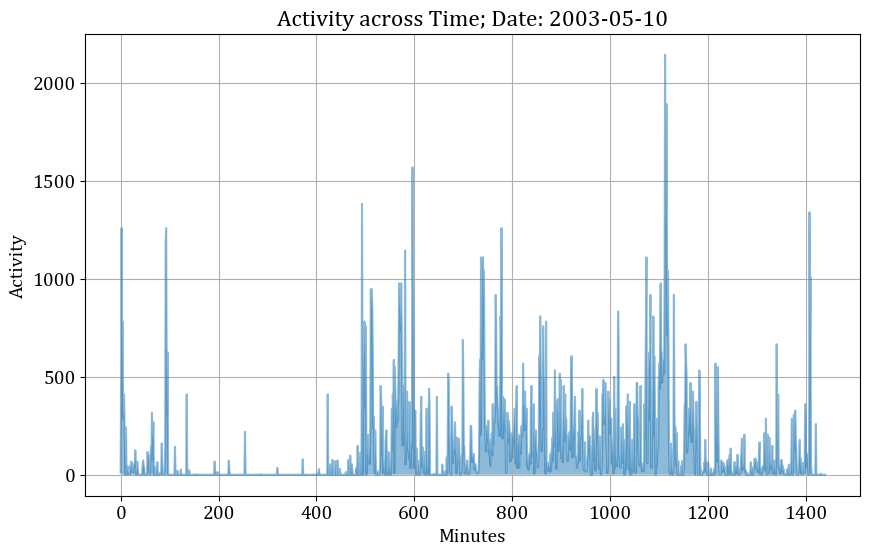

Max activity: 2146


0.25       0.00
0.50      33.00
0.75     184.00
0.99    1097.35
Name: activity, dtype: float64

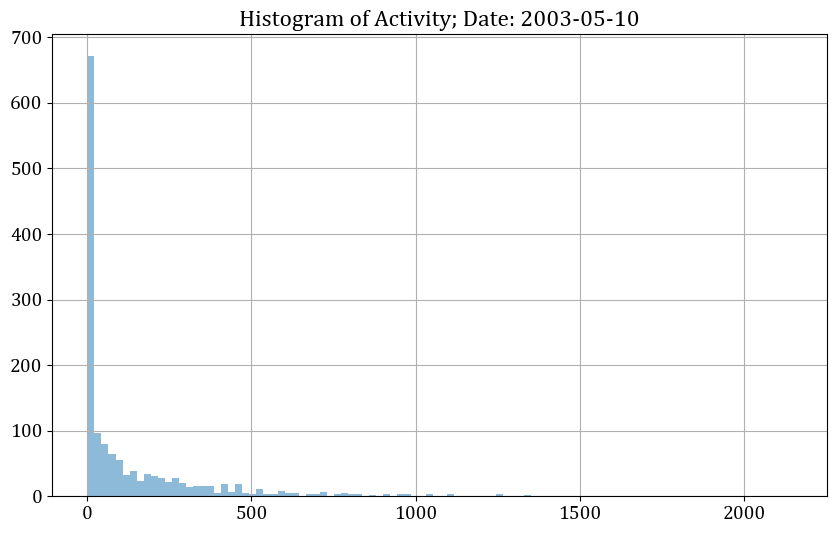

2003-05-11 (1440, 3) 99.43958333333333


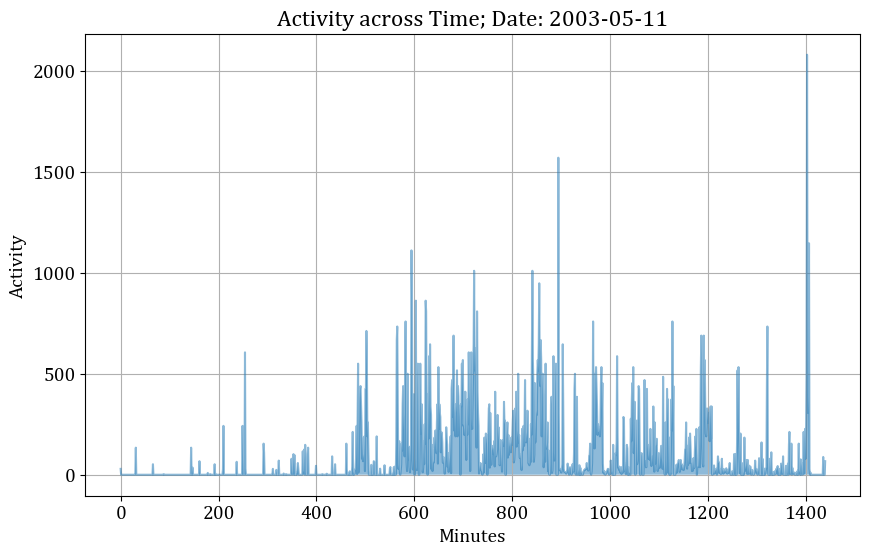

Max activity: 2080


0.25      0.0
0.50     15.0
0.75    134.0
0.99    759.0
Name: activity, dtype: float64

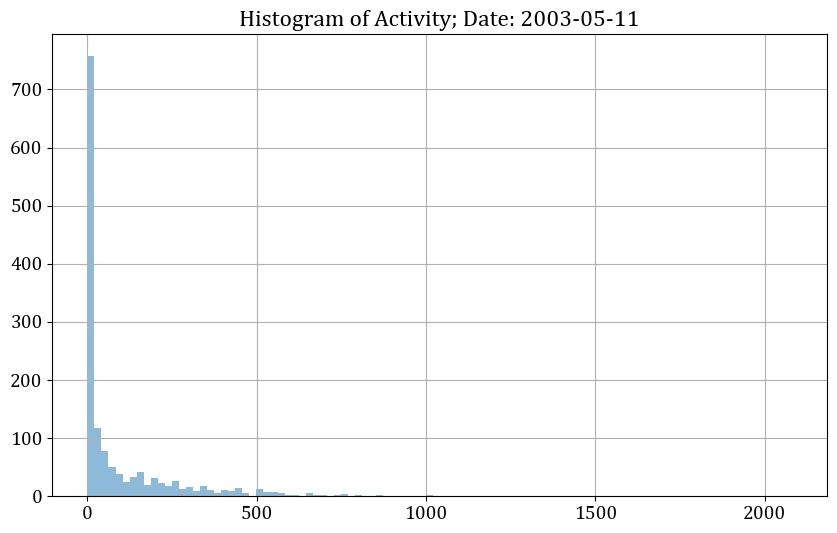

2003-05-12 (1440, 3) 316.87430555555557


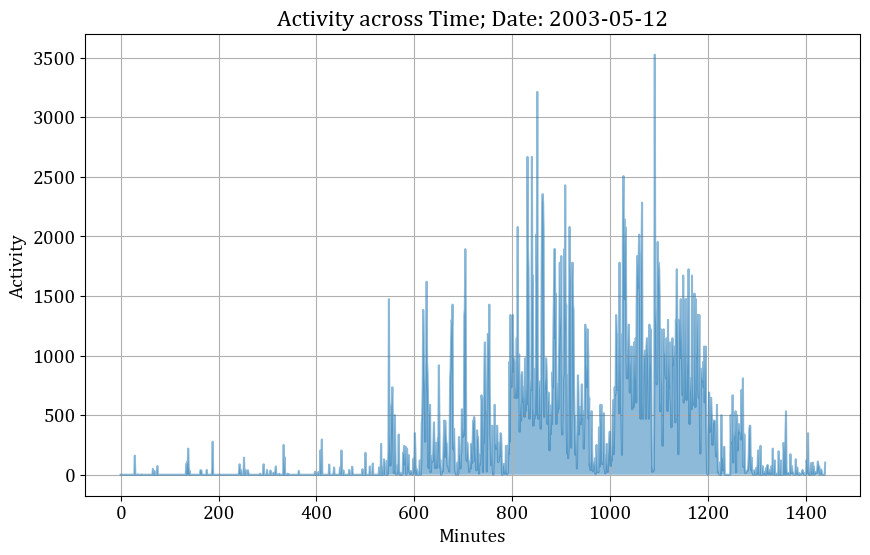

Max activity: 3526


0.25       0.00
0.50      40.50
0.75     500.00
0.99    2055.04
Name: activity, dtype: float64

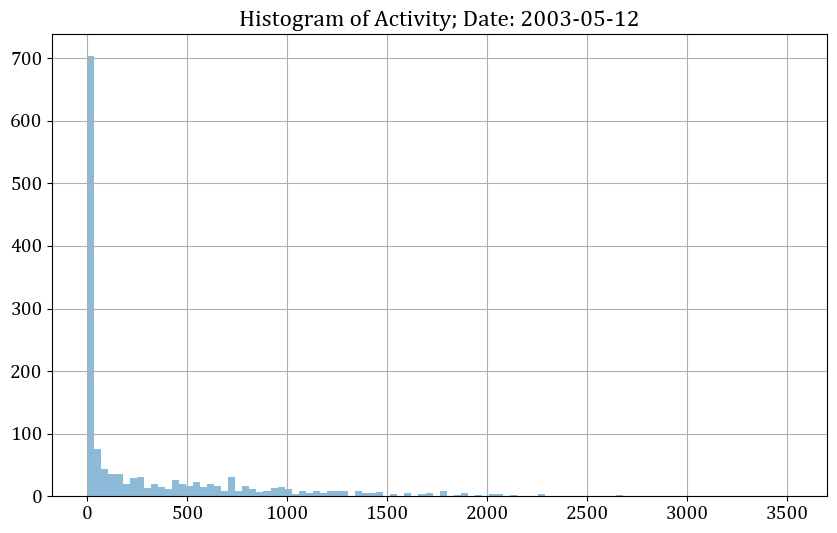

2003-05-13 (1440, 3) 108.47569444444444


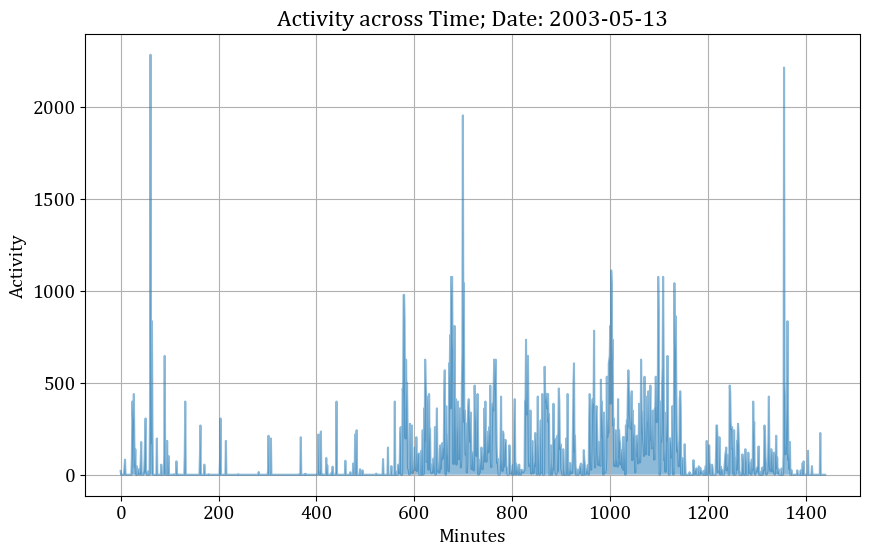

Max activity: 2284


0.25      0.00
0.50     11.50
0.75    148.00
0.99    879.08
Name: activity, dtype: float64

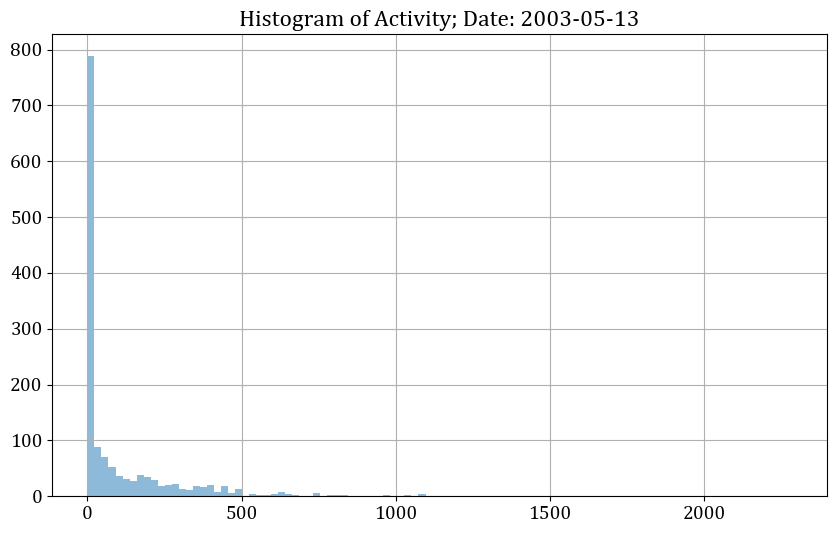

2003-05-14 (1440, 3) 155.68472222222223


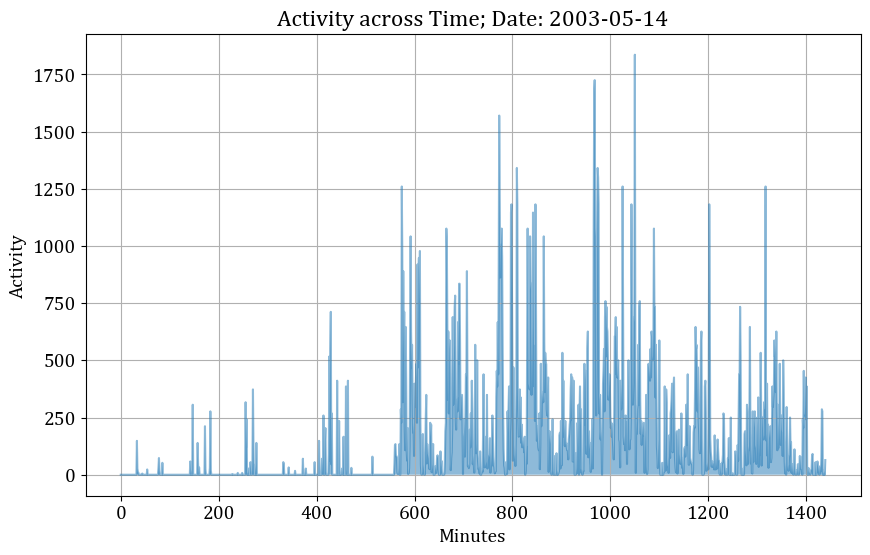

Max activity: 1836


0.25       0.0
0.50      32.0
0.75     227.0
0.99    1182.0
Name: activity, dtype: float64

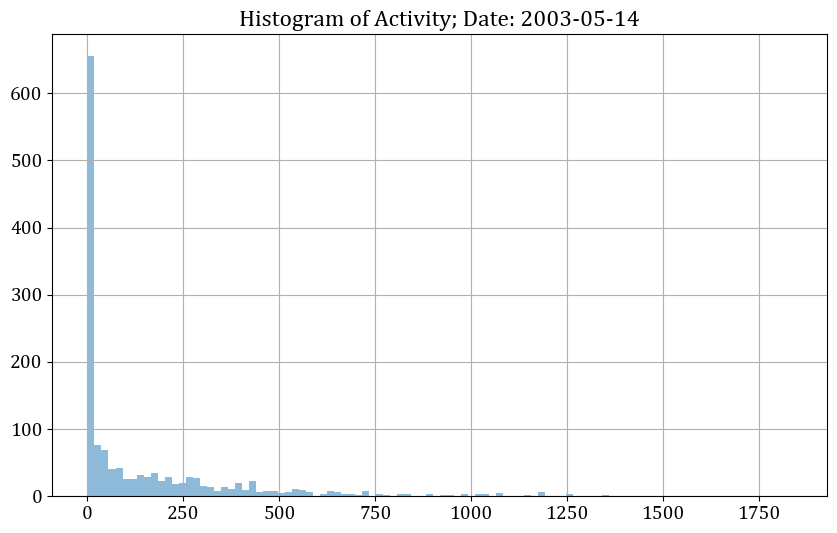

2003-05-15 (1440, 3) 170.87708333333333


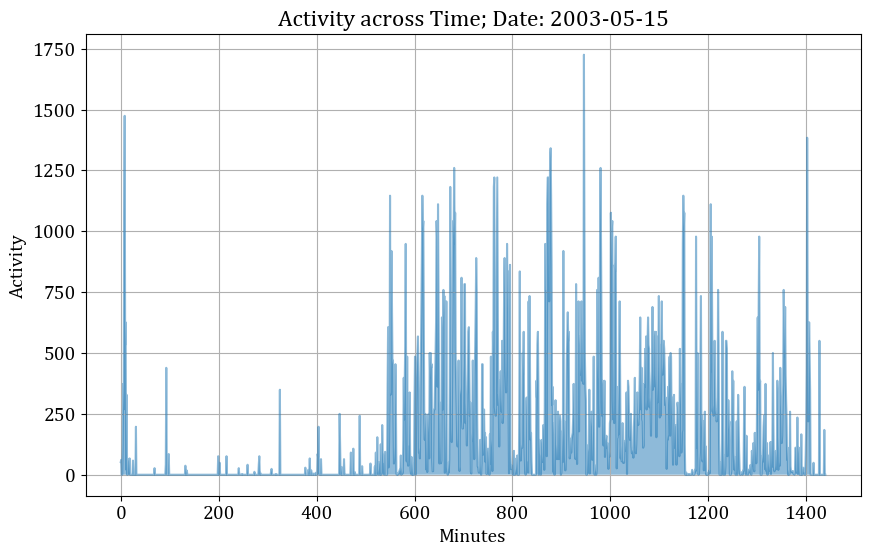

Max activity: 1725


0.25       0.0
0.50      31.0
0.75     250.0
0.99    1146.0
Name: activity, dtype: float64

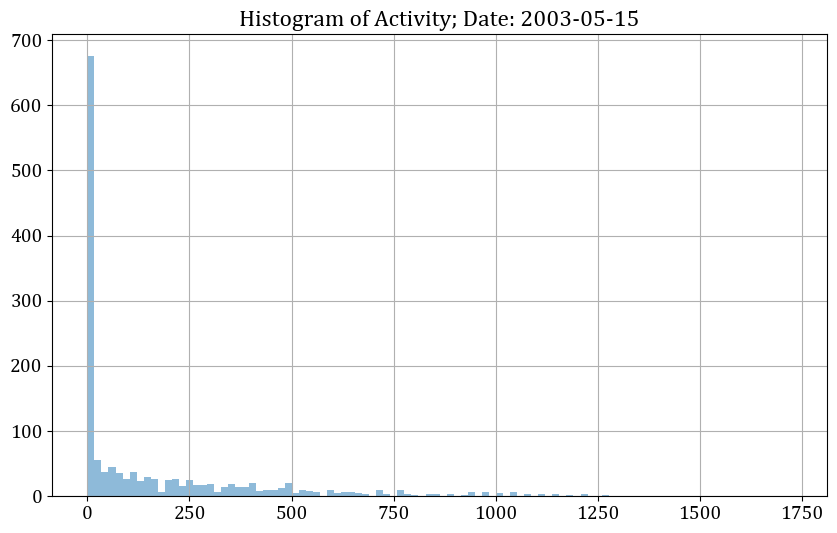

2003-05-16 (1440, 3) 190.50833333333333


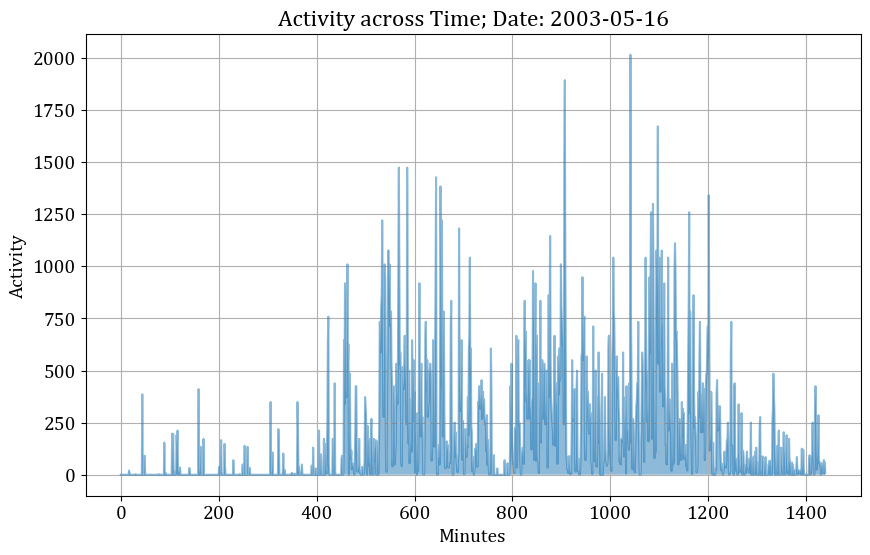

Max activity: 2016


0.25       0.00
0.50      61.00
0.75     288.50
0.99    1167.96
Name: activity, dtype: float64

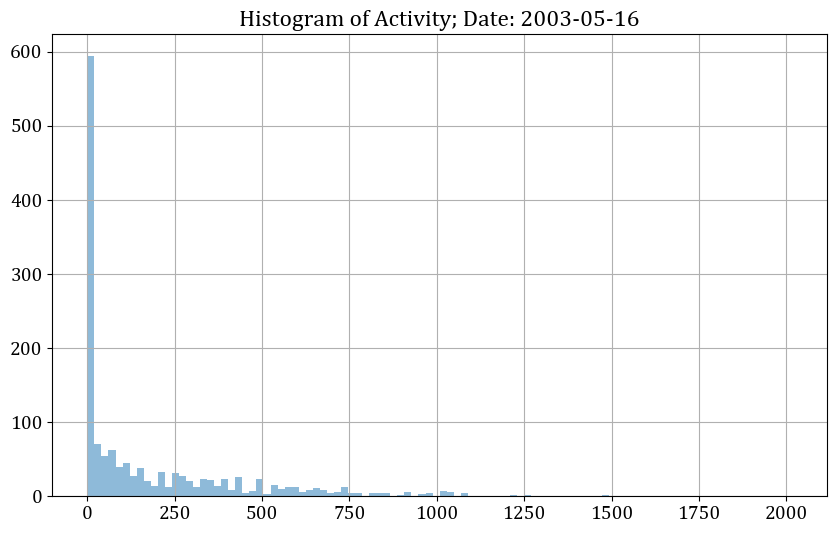

2003-05-17 (1440, 3) 177.76041666666666


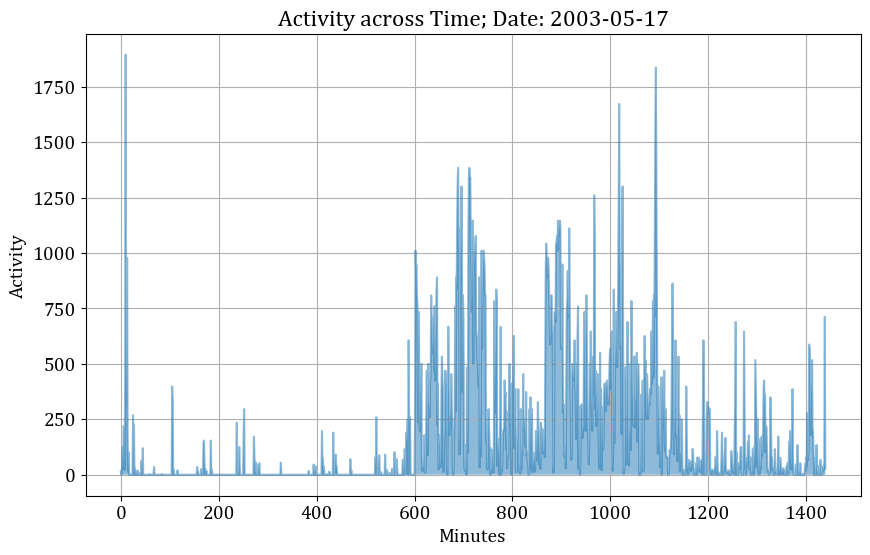

Max activity: 1894


0.25       0.00
0.50      24.00
0.75     250.00
0.99    1205.79
Name: activity, dtype: float64

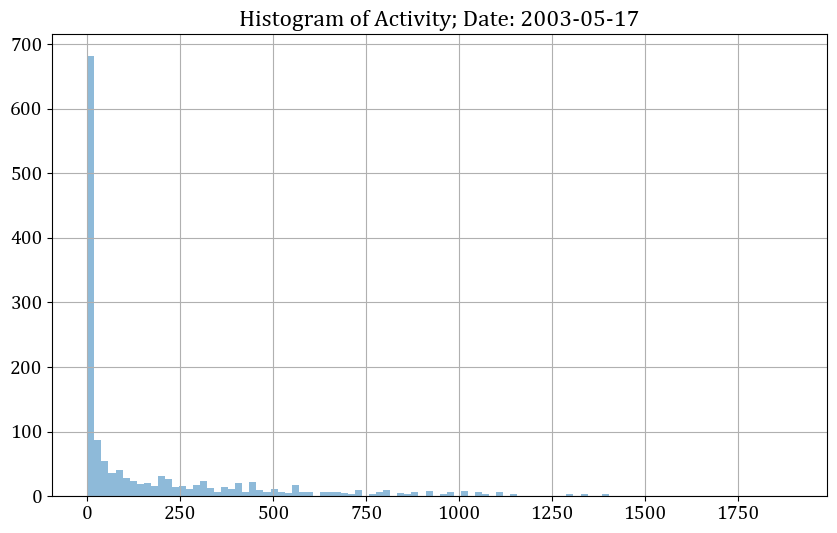

2003-05-18 (1440, 3) 97.72916666666667


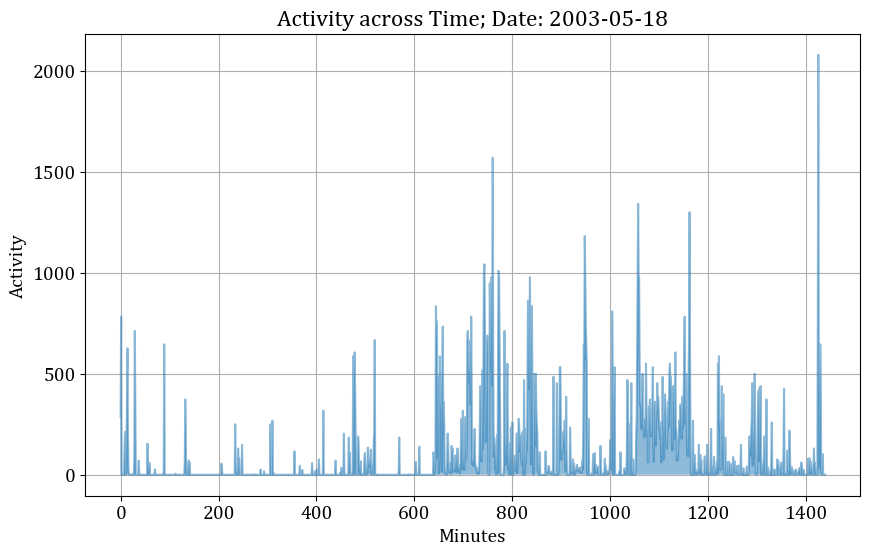

Max activity: 2080


0.25      0.0
0.50      0.0
0.75     91.0
0.99    966.3
Name: activity, dtype: float64

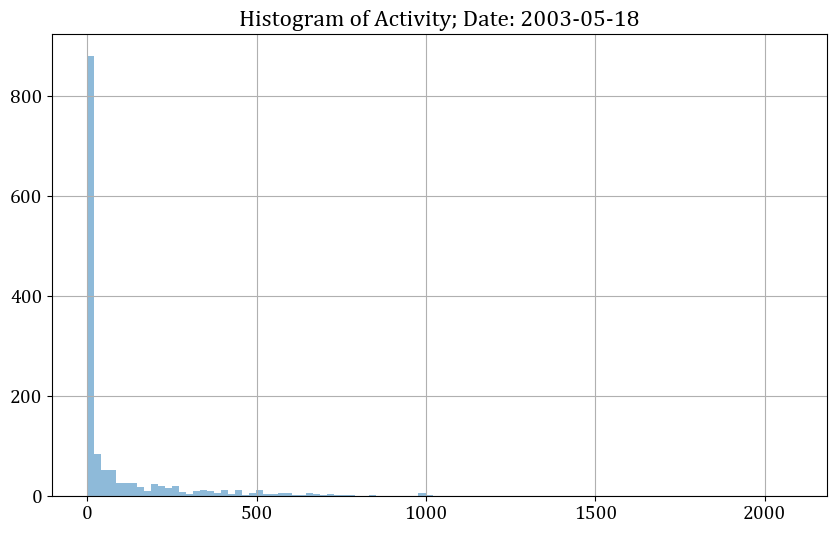

2003-05-19 (1440, 3) 168.1027777777778


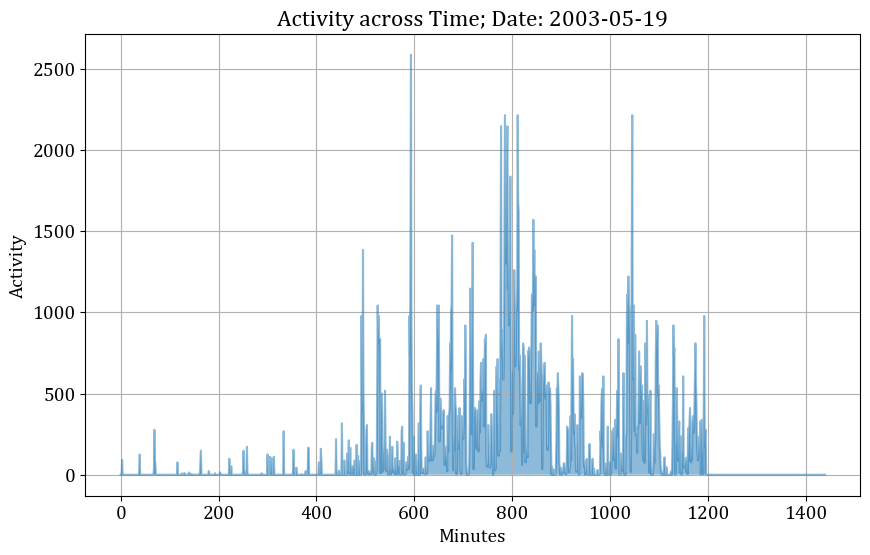

Max activity: 2586


0.25       0.00
0.50       0.00
0.75     191.75
0.99    1474.00
Name: activity, dtype: float64

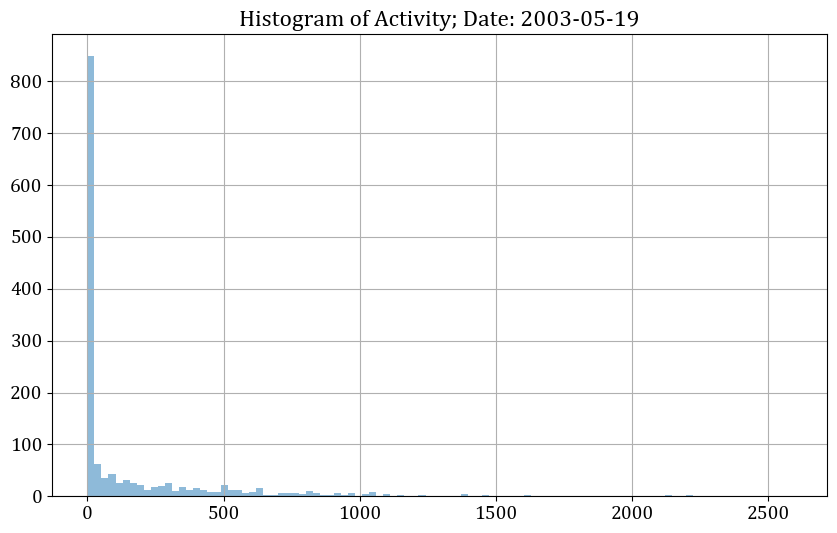

2003-05-20 (1440, 3) 111.48819444444445


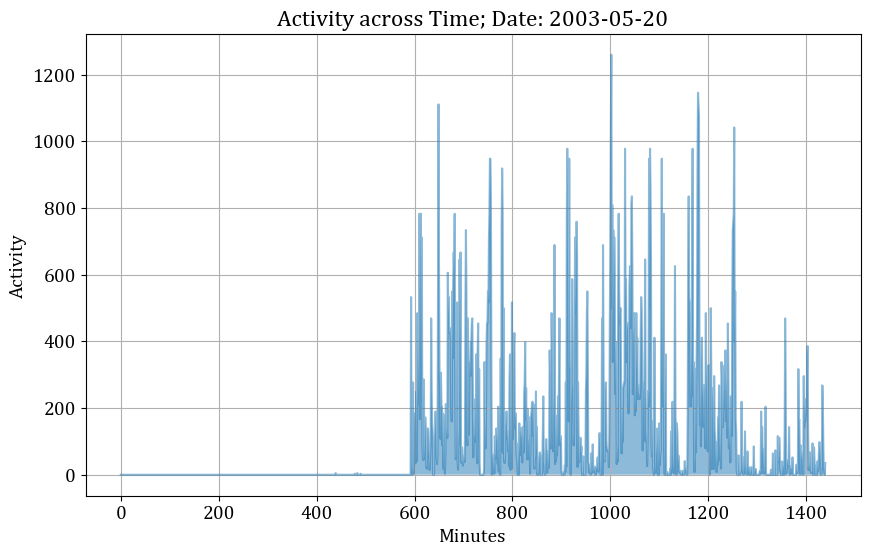

Max activity: 1260


0.25      0.0
0.50      3.0
0.75    130.0
0.99    948.0
Name: activity, dtype: float64

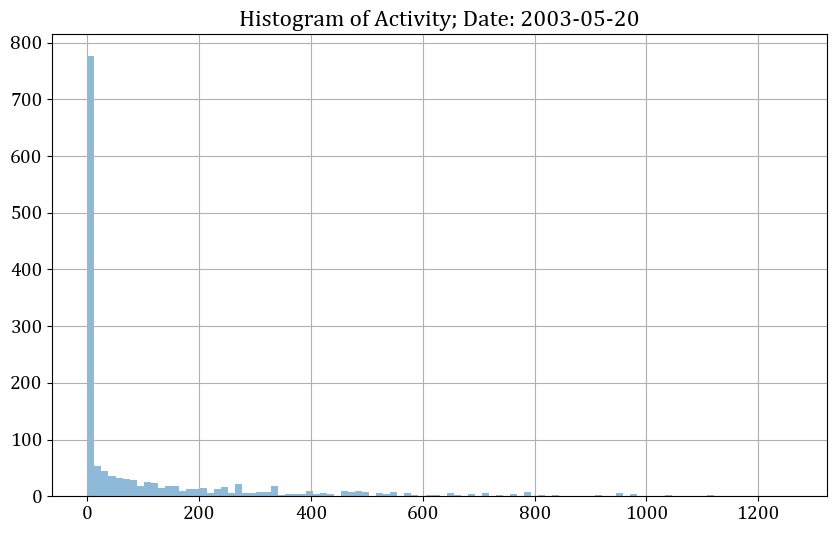

2003-05-21 (1440, 3) 199.59722222222223


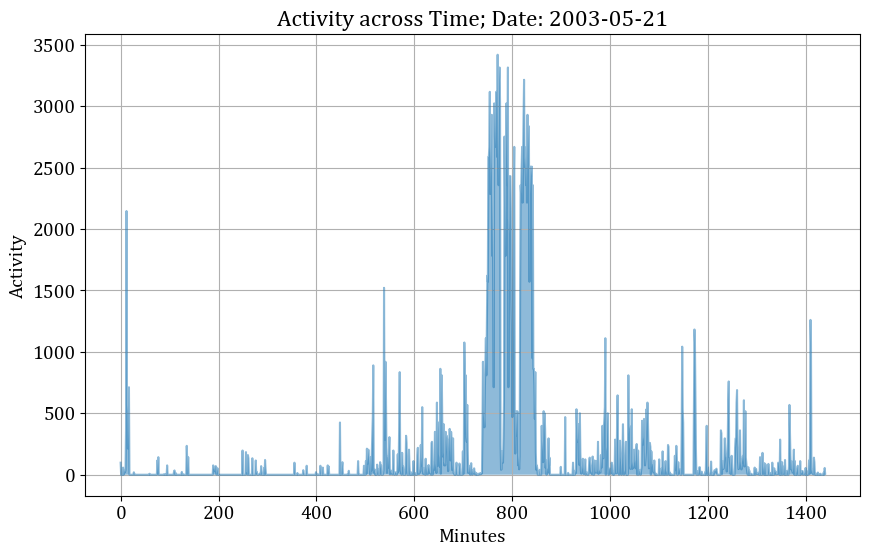

Max activity: 3418


0.25       0.0
0.50       3.0
0.75      98.0
0.99    2839.0
Name: activity, dtype: float64

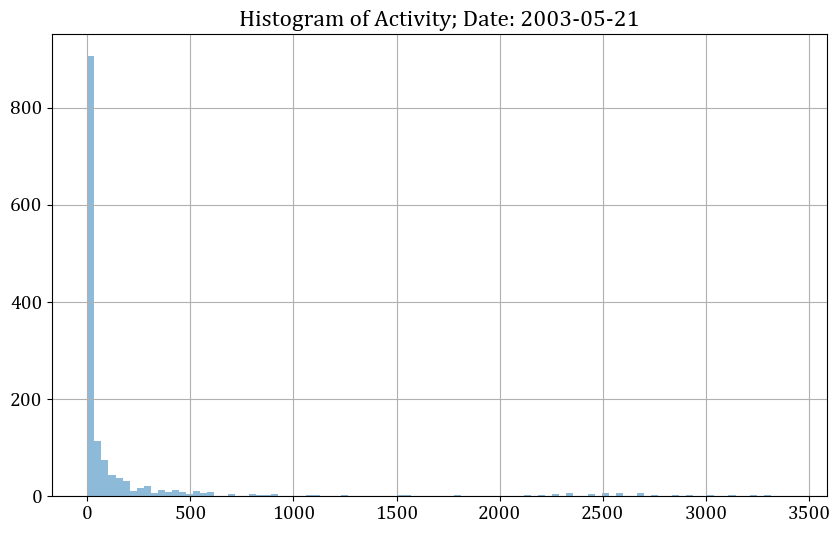

2003-05-22 (1440, 3) 71.1125


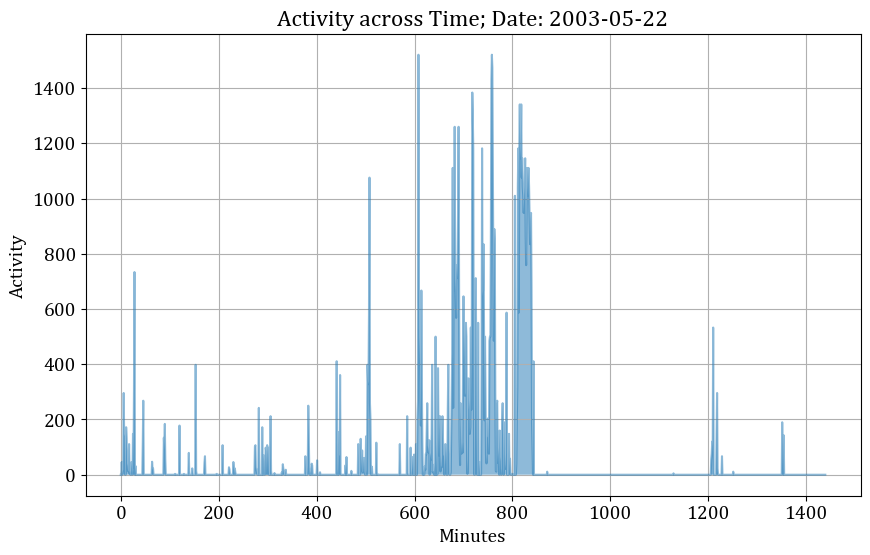

Max activity: 1521


0.25       0.00
0.50       0.00
0.75       0.00
0.99    1167.96
Name: activity, dtype: float64

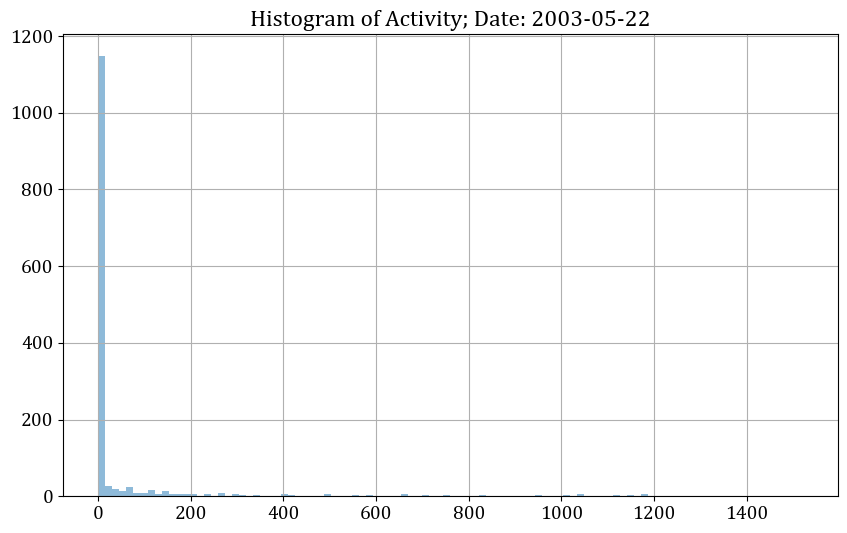

2003-05-23 (924, 3) 2.9913419913419914


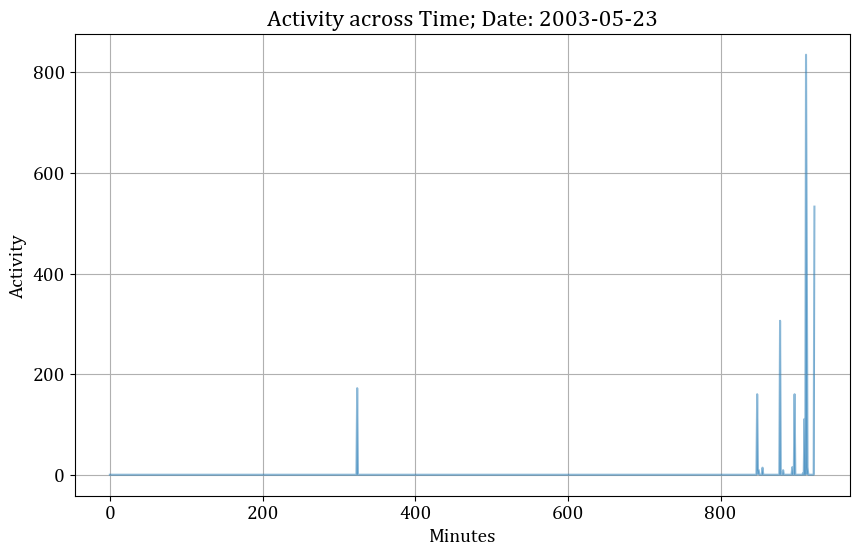

Max activity: 835


0.25     0.00
0.50     0.00
0.75     0.00
0.99    14.77
Name: activity, dtype: float64

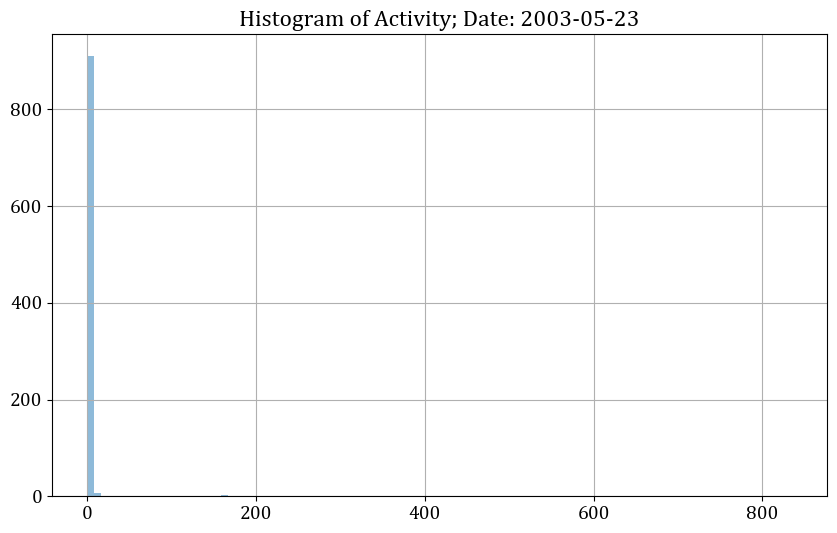

In [4]:
for date, df_tmp in df_act_condn.groupby("date"):
    print(date, df_tmp.shape, df_tmp["activity"].mean())
    plt.figure()
    plt.plot(range(df_tmp["activity"].size), df_tmp["activity"], alpha=0.5)
    plt.fill_between(range(df_tmp["activity"].shape[0]), df_tmp["activity"], \
                 where=df_tmp["activity"]>0, interpolate=True, alpha=0.5)
    plt.xlabel("Minutes")
    plt.ylabel("Activity")
    plt.title("Activity across Time; Date: "+date)
    plt.savefig(IPATH+"condn_0_date_"+str(date)+".png")
    plt.show()
    
    print("Max activity:", df_tmp["activity"].max())
    display(df_tmp["activity"].quantile(q=[0.25, 0.5, 0.75, 0.99]))
    
    plt.figure()
    plt.hist(df_tmp["activity"], bins=100, alpha=0.5)
    plt.title("Histogram of Activity; Date: "+str(date))
    plt.savefig(IPATH+"hist_condn_0_date_"+str(date)+".png")
    plt.show()
    
    print("="*80)

Except the first and last days, this patient has 1440 (number of minutes in a day) data points for all other days

Note the absence of data on one day. As described in the paper, this could correspond to instances where there is no input recorded by the actigraph. these could be durations where the sensor stopped working or went offline breifly or the participant might have removed the sensor.

In [5]:
# https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.NamedAgg.html
num_data_points = pd.NamedAgg(column="activity", aggfunc="count")
avg_act = pd.NamedAgg(column="activity", aggfunc="mean")
max_act = pd.NamedAgg(column="activity", aggfunc="max")

# Loop through all conditions
for condn_fname in condn_files:
    # Load a condition file
    df_act_condn = pd.read_csv(CDPATH+condn_fname)
    df_act_condn.head(10)
    df_new = df_act_condn.groupby("date").agg(num_data_points=num_data_points, avg_act=avg_act, max_act=max_act)
    display(df_new)

,num_data_points,avg_act,max_act
date,,,
2002-06-06,660,509.630303,2003
2002-06-07,1440,178.434722,2131
2002-06-08,1440,178.772222,2341
2002-06-09,1440,160.198611,2066
2002-06-10,1440,178.954861,1659
2002-06-11,1440,225.211111,2341
2002-06-12,1440,254.943750,3506
2002-06-13,1440,286.463889,3847
2002-06-14,1440,330.550694,3195


,num_data_points,avg_act,max_act
date,,,
2002-11-05,795,246.023899,1110
2002-11-06,1440,135.768750,1110
2002-11-07,1440,144.859722,2020
2002-11-08,1440,180.046528,2150
2002-11-09,1440,126.460417,1839
2002-11-10,1440,117.322222,2084
2002-11-11,1440,170.493750,3124
2002-11-12,1440,143.600694,1522
2002-11-13,1440,191.862500,1898


,num_data_points,avg_act,max_act
date,,,
2002-05-24,750,127.129333,1958
2002-05-25,1440,72.238194,1386
2002-05-26,1440,61.306250,1898
2002-05-27,1440,72.115278,1147
2002-05-28,1440,91.186111,2084
2002-05-29,1440,32.315972,1673
2002-05-30,1440,69.749306,2020
2002-05-31,1440,80.160417,1301
2002-06-01,1440,89.594444,1430


,num_data_points,avg_act,max_act
date,,,
2002-06-13,625,95.956800,1725
2002-06-14,1440,75.080556,2146
2002-06-15,1440,53.889583,2507
2002-06-16,1440,26.894444,1341
2002-06-17,1440,86.122222,1780
2002-06-18,1440,92.044444,1894
2002-06-19,1440,101.710417,1836
2002-06-20,1440,97.862500,2016
2002-06-21,1440,89.186111,1954


,num_data_points,avg_act,max_act
date,,,
2002-08-29,570,176.733333,1621
2002-08-30,1440,152.131250,1726
2002-08-31,1440,69.827083,3537
2002-09-01,1440,81.056944,3537
2002-09-02,1440,219.061806,2288
2002-09-03,1440,199.300000,2361
2002-09-04,1440,318.611111,2361
2002-09-05,1440,172.038889,2218
2002-09-06,1440,147.395139,2288


,num_data_points,avg_act,max_act
date,,,
2005-11-08,690,102.037681,959
2005-11-09,1440,58.068056,723
2005-11-10,1440,67.372222,1234
2005-11-11,1440,72.817361,1355
2005-11-12,1440,77.766667,1089
2005-11-13,1440,86.177083,1355
2005-11-14,1440,65.537500,901
2005-11-15,1440,67.665972,1123
2005-11-16,1440,67.579861,1196


,num_data_points,avg_act,max_act
date,,,
2004-05-04,840,246.684524,3968
2004-05-05,1440,257.329861,2269
2004-05-06,1440,103.154167,1882
2004-05-07,1440,377.166667,3097
2004-05-08,1440,451.351389,3097
2004-05-09,1440,190.309722,4354
2004-05-10,1440,402.920139,2735
2004-05-11,1440,233.445833,4778
2004-05-12,1440,401.740278,4631


,num_data_points,avg_act,max_act
date,,,
2003-08-19,720,386.373611,2513
2003-08-20,1440,184.704861,2020
2003-08-21,1440,137.007639,3029
2003-08-22,1440,190.298611,2218
2003-08-23,1440,213.820833,4129
2003-08-24,1440,202.647222,4003
2003-08-25,1440,178.664583,2084
2003-08-26,1440,183.254167,1898
2003-08-27,1440,244.943056,2084


,num_data_points,avg_act,max_act
date,,,
2003-06-03,721,206.196949,3229
2003-06-04,1440,248.211806,2370
2003-06-05,1440,141.854861,1535
2003-06-06,1440,144.496528,1738
2003-06-07,1440,158.490278,4009
2003-06-08,1440,179.154861,2853
2003-06-09,1440,185.045139,2444
2003-06-10,1440,375.261111,3542
2003-06-11,1440,468.204167,4009


,num_data_points,avg_act,max_act
date,,,
2003-06-12,810,129.377778,1335
2003-06-13,1440,197.668750,1880
2003-06-14,1440,186.179167,2127
2003-06-15,1440,139.443056,2194
2003-06-16,1440,135.969444,2898
2003-06-17,1440,146.593056,1822
2003-06-18,1440,152.128472,2263
2003-06-19,1440,151.879861,1822
2003-06-20,1440,140.978472,2990


,num_data_points,avg_act,max_act
date,,,
2003-05-07,720,174.144444,2284
2003-05-08,1440,156.247222,1954
2003-05-09,1440,124.135417,1672
2003-05-10,1440,134.961806,2146
2003-05-11,1440,99.439583,2080
2003-05-12,1440,316.874306,3526
2003-05-13,1440,108.475694,2284
2003-05-14,1440,155.684722,1836
2003-05-15,1440,170.877083,1725


,num_data_points,avg_act,max_act
date,,,
2003-05-07,540,73.650000,1468
2003-05-08,1440,259.645139,3736
2003-05-09,1440,244.096528,3103
2003-05-10,1440,155.424306,1423
2003-05-11,1440,116.463889,1515
2003-05-12,1440,224.541667,3300
2003-05-13,1440,240.961806,2918
2003-05-14,1440,226.484722,2420
2003-05-15,1440,338.096528,2741


,num_data_points,avg_act,max_act
date,,,
2003-05-19,540,10.903704,264
2003-05-20,1440,276.413889,2269
2003-05-21,1440,193.988194,2066
2003-05-22,1440,221.613889,3002
2003-05-23,1440,324.692361,2492
2003-05-24,1440,236.545139,1942
2003-05-25,1440,285.688889,3296
2003-05-26,1440,296.554861,3506
2003-05-27,1440,215.581250,2651


,num_data_points,avg_act,max_act
date,,,
2004-05-06,840,326.533333,4517
2004-05-07,1440,221.910417,4805
2004-05-08,1440,282.743750,5437
2004-05-09,1440,194.040278,3116
2004-05-10,1440,327.147222,3991
2004-05-11,1440,80.737500,2080
2004-05-12,1440,322.917361,3869
2004-05-13,1440,167.770139,4116
2004-05-14,1440,181.884028,5437


,num_data_points,avg_act,max_act
date,,,
2004-05-27,690,309.172464,2003
2004-05-28,1440,170.072222,2066
2004-05-29,1440,178.372222,2066
2004-05-30,1440,187.088889,2735
2004-05-31,1440,134.013889,2003
2004-06-01,1440,190.214583,2269
2004-06-02,1440,191.838194,2492
2004-06-03,1440,181.152083,2003
2004-06-04,1440,182.872222,2131


,num_data_points,avg_act,max_act
date,,,
2005-09-22,840,357.600000,2668
2005-09-23,1440,351.057639,2752
2005-09-24,1440,320.678472,6964
2005-09-25,1440,251.465278,2356
2005-09-26,1440,246.621528,2839
2005-09-27,1440,272.051389,1954
2005-09-28,1440,225.793056,2507
2005-09-29,1440,252.787500,2214
2005-09-30,1440,190.786806,3418


,num_data_points,avg_act,max_act
date,,,
2005-11-08,870,99.170115,801
2005-11-09,1440,84.488194,1558
2005-11-10,1440,66.443750,1002
2005-11-11,1440,73.250000,1882
2005-11-12,1440,75.106250,1174
2005-11-13,1440,85.565972,1250
2005-11-14,1440,95.876389,1824
2005-11-15,1440,82.551389,1102
2005-11-16,1440,100.211806,1882


,num_data_points,avg_act,max_act
date,,,
2005-08-30,840,195.494048,2042
2005-08-31,1440,175.639583,2962
2005-09-01,1440,131.647917,2784
2005-09-02,1440,242.243056,6825
2005-09-03,1440,88.244444,2312
2005-09-04,1440,78.904167,1277
2005-09-05,1440,37.477778,1162
2005-09-06,1440,52.272917,1802
2005-09-07,1440,70.611806,1860


,num_data_points,avg_act,max_act
date,,,
2005-08-18,810,160.497531,2080
2005-08-19,1440,143.526389,2929
2005-08-20,1440,61.406944,1836
2005-08-21,1440,55.741667,978
2005-08-22,1440,69.557639,2284
2005-08-23,1440,69.473611,1570
2005-08-24,1440,87.114583,1894
2005-08-25,1440,54.871528,1341
2005-08-26,1440,102.237500,1672


,num_data_points,avg_act,max_act
date,,,
2004-08-31,900,288.682222,2275
2004-09-01,1440,426.464583,2347
2004-09-02,1440,362.567361,2741
2004-09-03,1440,335.220833,2420
2004-09-04,1440,328.849306,2420
2004-09-05,1440,312.786806,2576
2004-09-06,1440,262.444444,2138
2004-09-07,1440,376.700694,3200
2004-09-08,1440,311.227778,4935


,num_data_points,avg_act,max_act
date,,,
2004-09-28,870,173.042529,2911
2004-09-29,1440,132.408333,2131
2004-09-30,1440,138.045833,1824
2004-10-01,1440,184.743750,2199
2004-10-02,1440,204.065972,2066
2004-10-03,1440,49.852778,1418
2004-10-04,1440,71.424306,1882
2004-10-05,1440,113.327083,2131
2004-10-06,1440,131.345139,1712


,num_data_points,avg_act,max_act
date,,,
2005-08-11,900,359.184444,2618
2005-08-12,1440,293.556250,2106
2005-08-13,1440,257.502083,1919
2005-08-14,1440,136.571528,1693
2005-08-15,1440,314.245833,2460
2005-08-16,1440,227.264583,2700
2005-08-17,1440,257.734722,2784
2005-08-18,1440,290.222222,2871
2005-08-19,1440,331.838194,4859


,num_data_points,avg_act,max_act
date,,,
2005-03-08,840,339.245238,3200
2005-03-09,1440,116.794444,1773
2005-03-10,1440,257.561111,3103
2005-03-11,1440,195.871528,1946
2005-03-12,1440,168.595139,1886
2005-03-13,1440,174.361806,3622
2005-03-14,1440,236.844444,1773
2005-03-15,1440,137.084028,1423
2005-03-16,1440,129.812500,1614


In [6]:
# Stack the dataset to create a matrix of size num_samples*1440 for the control group
threshold = 50
mapping_condn = {}

for condn_idx in tqdm(range(len(condn_files))):
    condn_fname = "condition_"+str(condn_idx+1)+".csv"
    # Load a condition file
    df_act_condn = pd.read_csv(CDPATH+condn_fname)
    df_act_condn.head(10)
    df_new = df_act_condn.groupby("date", as_index=False).agg(num_data_points=num_data_points, avg_act=avg_act, max_act=max_act)
    
    # Masking
    cleaned_df = df_new[df_new["num_data_points"] == 1440]
    cleaned_df = cleaned_df[cleaned_df["avg_act"] > threshold]

    # Patient-wise normalization
    norm_cleaned_df = df_act_condn.copy()
    norm_cleaned_df["activity"] = (norm_cleaned_df["activity"]-norm_cleaned_df["activity"].mean())/norm_cleaned_df["activity"].std()
    
    # display(cleaned_df)t
    
    # get all the final dates
    for date_idx, date in enumerate(cleaned_df["date"]):
        tmp_data = df_act_condn[df_act_condn["date"] == date]["activity"].to_numpy().reshape(1, 1440)
        norm_data = norm_cleaned_df[norm_cleaned_df["date"]==date]["activity"].to_numpy().reshape(1, 1440)
        
        if condn_idx == 0 and date_idx == 0:
            X_condn = tmp_data
            X_condn_norm = norm_data
        else:
            X_condn = np.vstack([X_condn, tmp_data])
            X_condn_norm = np.vstack([X_condn_norm, norm_data])
        
    mapping_condn[condn_idx] = cleaned_df["date"].size
    
X_condn.shape, X_condn_norm.shape

  0%|          | 0/23 [00:00<?, ?it/s]

((320, 1440), (320, 1440))

In [7]:
# Stack the dataset to create a matrix of size num_samples*1440 for the control group
threshold = 50
mapping_cntrl = {}

for cntrl_idx in tqdm(range(len(cntrl_files))):
    cntrl_fname = "control_"+str(cntrl_idx+1)+".csv"
    # Load a condition file
    df_act_cntrl = pd.read_csv(CNPATH+cntrl_fname)
    df_act_cntrl.head(10)
    df_new = df_act_cntrl.groupby("date", as_index=False).agg(num_data_points=num_data_points, avg_act=avg_act, max_act=max_act)
    
    # Masking
    cleaned_df = df_new[df_new["num_data_points"] == 1440]
    cleaned_df = cleaned_df[cleaned_df["avg_act"] > threshold]

    # Patient-wise normalization
    norm_cleaned_df = df_act_cntrl.copy()
    norm_cleaned_df["activity"] = (norm_cleaned_df["activity"]-norm_cleaned_df["activity"].mean())/norm_cleaned_df["activity"].std()
    
    # display(cleaned_df)t
    
    # get all the final dates
    for date_idx, date in enumerate(cleaned_df["date"]):
        tmp_data = df_act_cntrl[df_act_cntrl["date"] == date]["activity"].to_numpy().reshape(1, 1440)
        norm_data = norm_cleaned_df[norm_cleaned_df["date"]==date]["activity"].to_numpy().reshape(1, 1440)
        
        if cntrl_idx == 0 and date_idx == 0:
            X_cntrl = tmp_data
            X_cntrl_norm = norm_data
        else:
            X_cntrl = np.vstack([X_cntrl, tmp_data])
            X_cntrl_norm = np.vstack([X_cntrl_norm, norm_data])
        
    mapping_cntrl[cntrl_idx] = cleaned_df["date"].size
    
X_cntrl.shape, X_cntrl_norm.shape

  0%|          | 0/32 [00:00<?, ?it/s]

((453, 1440), (453, 1440))

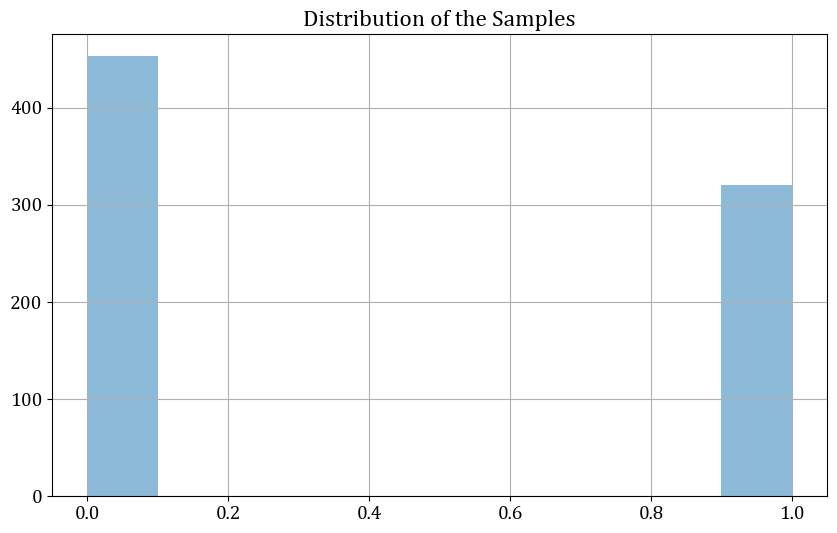

In [8]:
# Create the y matrix for classification
y = np.ones((X_condn.shape[0], 1))
y = np.vstack([y, np.zeros((X_cntrl.shape[0], 1))])
plt.hist(y, alpha=0.5)
plt.title("Distribution of the Samples")
plt.show()

X = np.vstack([X_condn, X_cntrl])
X_norm = np.vstack([X_condn_norm, X_cntrl_norm])

fout = open(DPATH+"mapping_condn.pkl", "wb")
pickle.dump(mapping_condn, fout)
fout.close()

fout = open(DPATH+"mapping_cntrl.pkl", "wb")
pickle.dump(mapping_cntrl, fout)
fout.close()

In [9]:
df_score = pd.read_csv(DPATH+"scores_final.csv", index_col=0)
display(df_score.head())

print("Mapping for Control")
df_map_cntrl = pd.DataFrame.from_dict(mapping_cntrl, orient="index")
df_map_cntrl.reset_index(inplace=True)
df_map_cntrl.rename(columns={0:"Number of Samples", "index":"Participant Index"}, inplace=True)
display(df_map_cntrl.head(2))
print("Mapping for Condition")
df_map_condn = pd.DataFrame.from_dict(mapping_condn, orient="index")
df_map_condn.reset_index(inplace=True)
df_map_condn.rename(columns={0:"Number of Samples", "index":"Participant Index"}, inplace=True)
display(df_map_condn.head(2))

cumsum_cntrl = list(np.cumsum(df_map_cntrl["Number of Samples"]))
cumsum_cntrl.insert(0, 0)
cumsum_condn = list(np.cumsum(df_map_condn["Number of Samples"]))
cumsum_condn.insert(0, 0)

########### Condition
age_condn = np.zeros((X_condn.shape[0], 1))
gender_condn = np.zeros((X_condn.shape[0], 1))
madrs1_condn = np.zeros((X_condn.shape[0], 1))
madrs2_condn = np.zeros((X_condn.shape[0], 1))

for i in df_map_condn["Participant Index"]:
    name = "condition_"+str(i+1)
    age = df_score[df_score["number"]==name]["age"]
    age_condn[cumsum_condn[i-1]:cumsum_condn[i]] = age
    
    gender = df_score[df_score["number"]==name]["gender"]
    gender_condn[cumsum_condn[i-1]:cumsum_condn[i]] = gender
    
    madrs1 = df_score[df_score["number"]==name]["madrs1"]
    madrs1_condn[cumsum_condn[i-1]:cumsum_condn[i]] = madrs1
    
    madrs2 = df_score[df_score["number"]==name]["madrs2"]
    madrs2_condn[cumsum_condn[i-1]:cumsum_condn[i]] = madrs2
    

########### Control
age_cntrl = np.zeros((X_cntrl.shape[0], 1))
gender_cntrl = np.zeros((X_cntrl.shape[0], 1))
madrs1_cntrl = np.zeros((X_cntrl.shape[0], 1))
madrs2_cntrl = np.zeros((X_cntrl.shape[0], 1))

for i in df_map_cntrl["Participant Index"]:
    name = "control_"+str(i+1)
    age = df_score[df_score["number"]==name]["age"]
    age_cntrl[cumsum_cntrl[i-1]:cumsum_cntrl[i]] = age
    
    gender = df_score[df_score["number"]==name]["gender"]
    gender_cntrl[cumsum_cntrl[i-1]:cumsum_cntrl[i]] = gender
    
    madrs1 = df_score[df_score["number"]==name]["madrs1"]
    madrs1_cntrl[cumsum_cntrl[i-1]:cumsum_cntrl[i]] = madrs1
    
    madrs2 = df_score[df_score["number"]==name]["madrs2"]
    madrs2_cntrl[cumsum_cntrl[i-1]:cumsum_cntrl[i]] = madrs2

########### Combine all data
all_age = np.vstack([age_condn, age_cntrl])
all_gender = np.vstack([gender_condn, gender_cntrl])

all_madrs1 = np.vstack([madrs1_condn, madrs1_cntrl])
all_madrs2 = np.vstack([madrs2_condn, madrs2_cntrl])

X_age_gender = np.hstack([X, all_age, all_gender])
X_madrs = np.hstack([X, all_madrs1, all_madrs2])

X_age_gender_norm = np.hstack([X_norm, all_age, all_gender])
X_madrs_norm = np.hstack([X_norm, all_madrs1, all_madrs2])
X_age_gender.shape, X_madrs.shape, X_age_gender_norm.shape, X_madrs_norm.shape

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,depressed,Delta madrs,Avg madrs
0,condition_1,11,2,3,2,2,2,2,1,2,19,19,1,0,19
1,condition_2,18,2,4,1,2,2,2,2,2,24,11,1,-13,17
2,condition_3,13,1,5,2,2,2,2,2,2,24,25,1,1,24
3,condition_4,13,2,1,2,2,2,0,1,1,20,16,1,-4,18
4,condition_5,13,2,6,2,2,2,0,2,2,26,26,1,0,26


Mapping for Control


,Participant Index,Number of Samples
0,0,16
1,1,21


Mapping for Condition


,Participant Index,Number of Samples
0,0,15
1,1,19


((773, 1442), (773, 1442), (773, 1442), (773, 1442))

In [10]:
# Ranodmly permute the dataset
np.random.seed(0)
num_total_samples = X.shape[0]
random_index = np.random.permutation(num_total_samples)

X = X[random_index, :]
X_age_gender = X_age_gender[random_index, :]
X_madrs = X_madrs[random_index, :]

X_norm = X_norm[random_index, :]
X_age_gender_norm = X_age_gender_norm[random_index, :]
X_madrs_norm = X_madrs_norm[random_index, :]

y = y[random_index, :]


# Save the variables
np.save(DPATH+"final_X.npy", X)
np.save(DPATH+"final_X_age_gender.npy", X_age_gender)
np.save(DPATH+"final_X_madrs.npy", X_madrs)

np.save(DPATH+"final_X_norm.npy", X_norm)
np.save(DPATH+"final_X_age_gender_norm.npy", X_age_gender_norm)
np.save(DPATH+"final_X_madrs_norm.npy", X_madrs_norm)

np.save(DPATH+"final_y.npy", y)